# PREDICTING BANK MARKETING SUCCESS

## AML Project: Group 7


### IMPORTING DATA


In [71]:
# Loading pandas Library
import pandas as pd

# Importing data
file_path = "C:/Users/Tanishka/Desktop/bank-additional-full.csv"
data = pd.read_csv(file_path, delimiter=';', quotechar='"')
print(data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [72]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [73]:
# Creating a dataframe

df = pd.DataFrame(data, columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'])

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Importing the libraries:

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

## Data Exploration:

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [76]:
# Duplicates data check

df.duplicated().sum()

12

In [77]:
# Removing duplicated records

df_clean = df.drop_duplicates()

df_clean

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [78]:
# Checking for NULL entries

df_clean.isnull().sum()

# No null entries found

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Text(0, 0.5, 'Frequency')

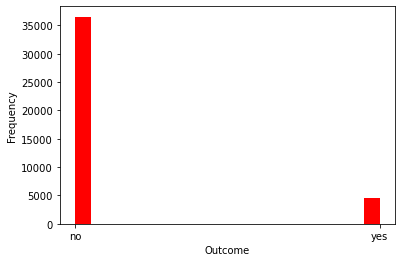

In [79]:
## Histogram with detailed labels
x = df_clean['y']
plt.hist(x, bins = 20, color = 'r')
plt.xlabel("Outcome")
plt.ylabel('Frequency')

# Data is Unbalanced.

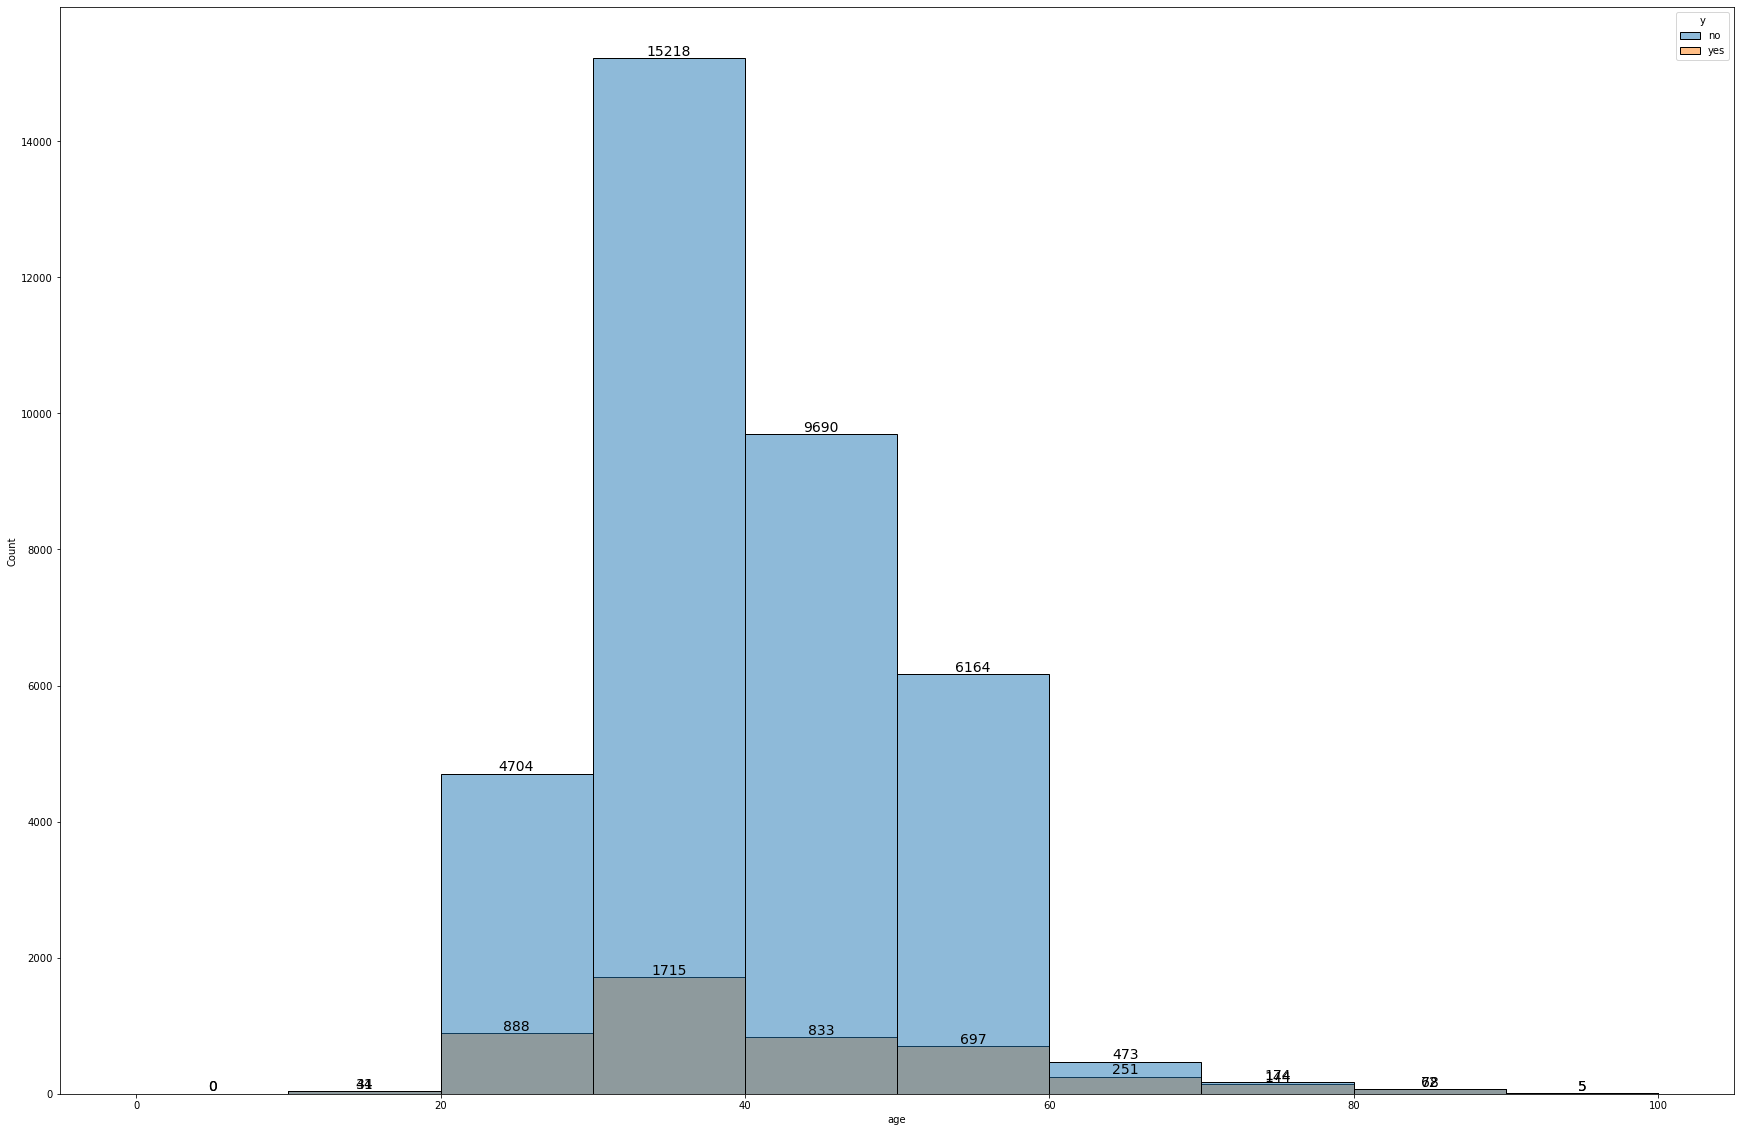

In [80]:
plt.figure(figsize=(30, 20))
# Define your age bins. For example, starting from 0 to 100 with 10-year increments
age_bins = list(range(0, 101, 10))
ax=sns.histplot(data = df_clean, x = 'age', hue = 'y', bins=age_bins)
for p in ax.patches:
    # Get the height and position of each patch (bar)
    height = p.get_height()
    # If height is NaN (empty bar), continue to next bar
    if not np.isnan(height):
        # Place text at the top of the bar
        ax.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}', ha="center", va="bottom", fontsize=14)

plt.show()

#result
# Age groups from 20-60 were the most contacted and also higest positive count was from 30-40. 
# However,the positive responce was barely 20%.
# Teenagers or senior citizens, who gave the most positive outcomes(more than 50%).

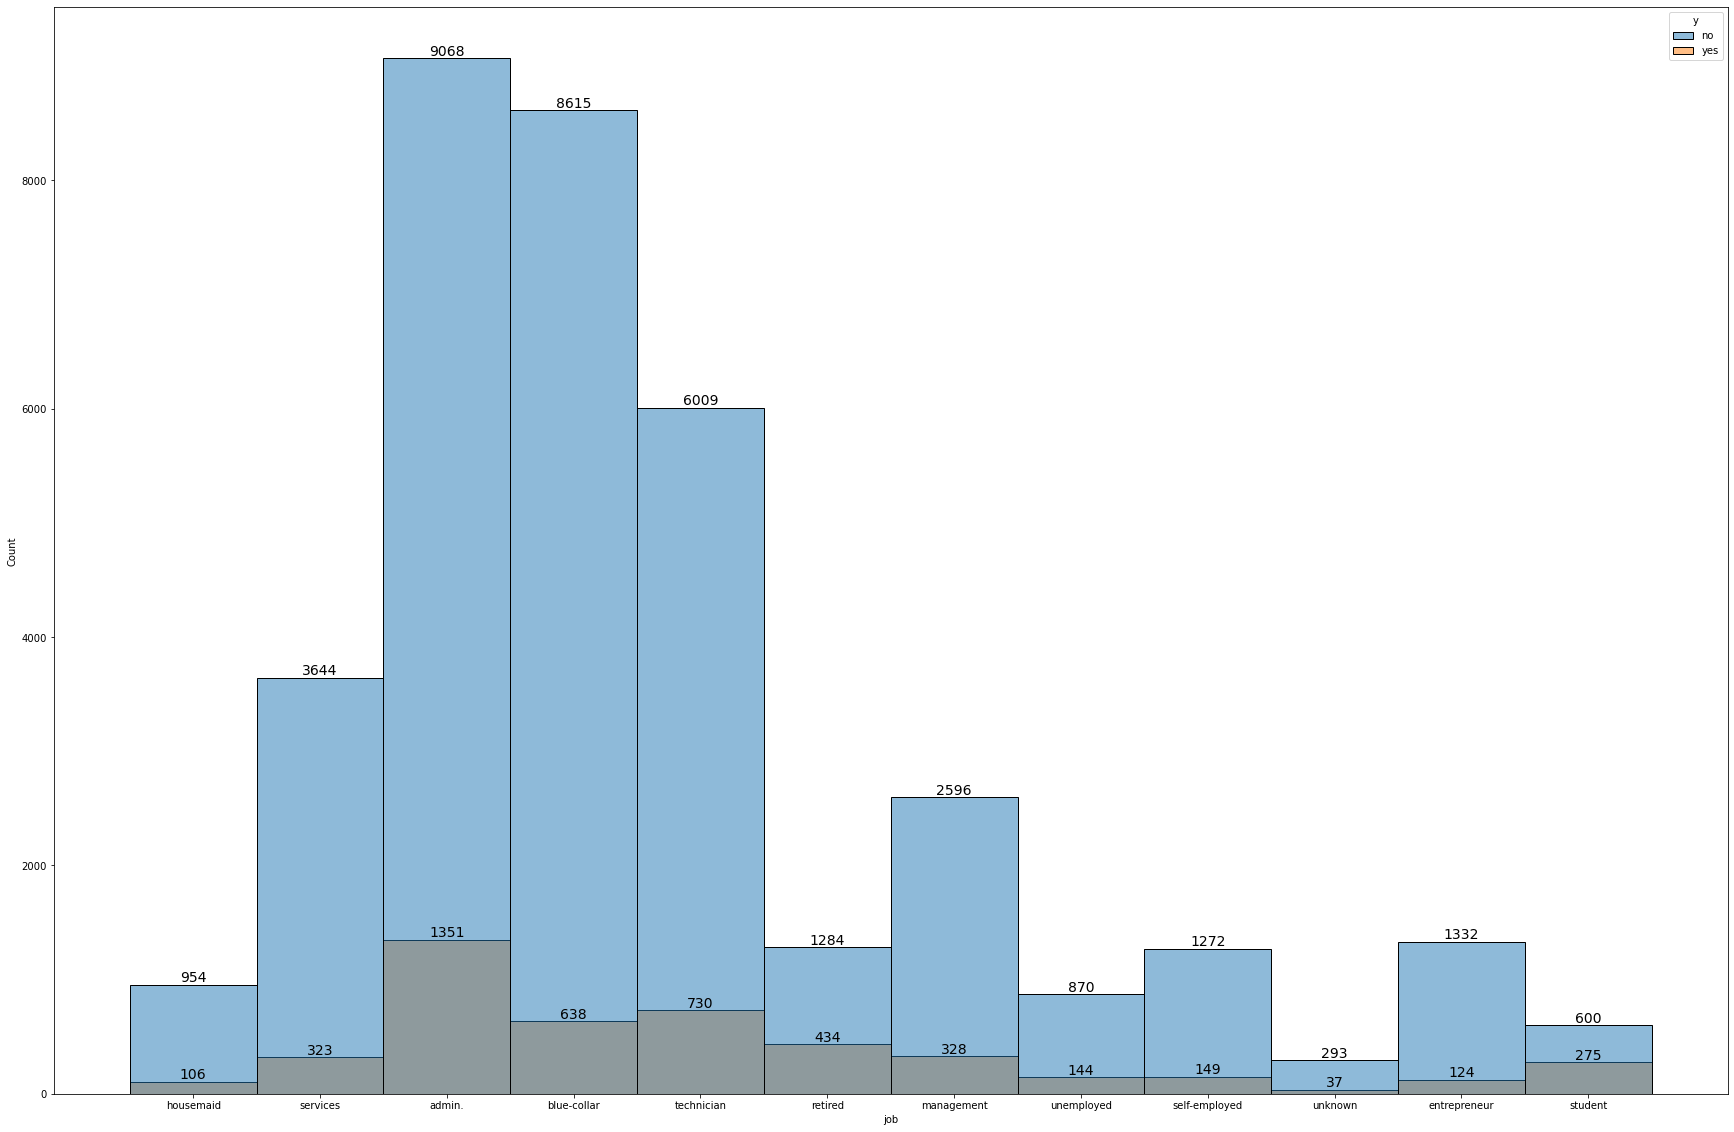

In [81]:
plt.figure(figsize=(30, 20))
ax=sns.histplot(data = df_clean, x = 'job', hue = 'y')
for p in ax.patches:
    # Get the height and position of each patch (bar)
    height = p.get_height()
    # If height is NaN (empty bar), continue to next bar
    if not np.isnan(height):
        # Place text at the top of the bar
        ax.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}', ha="center", va="bottom", fontsize=14)

plt.show()

#result
# Admin, Blue collar and technician were highly contacted and the highest positive response was from Admin and technician.
# However, Students were least contacted though they had maximum positive outcome of 50%.
# Percentagewise, students and retired people had highest positive outcome.
# Above statement also supports Age graph.

In [82]:
# Correlation matrix
var = ['age', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']


my_corr_matrix = df_clean[var].corr()

my_corr_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


<AxesSubplot:>

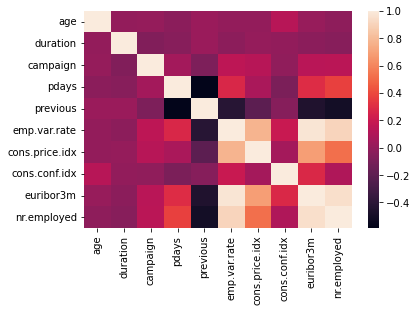

In [83]:
# heatmap

sns.heatmap(my_corr_matrix )

#result
# previous and pdays has strong negative corerelation. Also nr.employed and previous also have strong negative correlation.
# emp.var.rate and euribor3m have strong positive correlation.

Text(0, 0.5, 'No. of Employee')

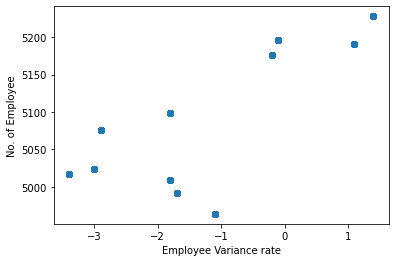

In [84]:
# Scatter plot with color

x = df_clean['emp.var.rate']
y = df_clean['nr.employed']
plt.scatter(x,y)
plt.xlabel('Employee Variance rate')
plt.ylabel('No. of Employee')

Text(0.5, 0, 'Employee Variance rate')

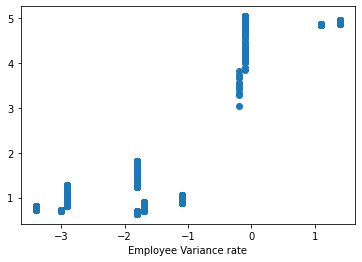

In [85]:
# Scatter plot with color

x = df_clean['emp.var.rate']
y = df_clean['euribor3m']
plt.scatter(x,y)
plt.xlabel('Employee Variance rate')

## Data Preperations:

In [86]:
# Finding the unique values in all charater variables:

unique_values_dict = {}
for col in df_clean.select_dtypes(include=['object']).columns:
    unique_values_dict[col] = df_clean[col].unique()

# Find the maximum length among the unique value arrays
max_length = max(len(arr) for arr in unique_values_dict.values())

# Pad arrays with NaN to make them of equal length
for col, values in unique_values_dict.items():
    unique_values_dict[col] = list(values) + [None] * (max_length - len(values))

# Create a new DataFrame from the updated dictionary
unique_values_df = pd.DataFrame(unique_values_dict)

unique_values_df

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,single,high.school,unknown,yes,yes,cellular,jun,tue,failure,yes
2,admin.,divorced,basic.6y,yes,unknown,unknown,None,jul,wed,success,None
3,blue-collar,unknown,basic.9y,None,None,None,None,aug,thu,None,None
4,technician,None,professional.course,None,None,None,None,oct,fri,None,None
5,retired,None,unknown,None,None,None,None,nov,None,None,None
6,management,None,university.degree,None,None,None,None,dec,None,None,None
7,unemployed,None,illiterate,None,None,None,None,mar,None,None,None
8,self-employed,None,None,None,None,None,None,apr,None,None,None
9,unknown,None,None,None,None,None,None,sep,None,None,None


In [87]:
df.copy = df_clean.copy()

df.copy['y'] = df.copy['y'].apply(lambda x: 1 if x == 'yes' else 0)

char_var = ['job' ,'marital' , 'education' , 'default' , 'housing' , 'loan' , 
        'contact' , 'month' , 'day_of_week' , 'poutcome']

num_var = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                      'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

df_encoded = pd.get_dummies(df.copy, columns=char_var)


numerical_data = df_encoded[num_var]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features using StandardScaler
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Replace the original numerical features in the DataFrame with the scaled features
df_encoded[num_var] = scaled_numerical_data

df_encoded



,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533143,0.010352,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,...,0,0,0,1,0,0,0,0,1,0
1,1.629107,-0.421577,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,...,0,0,0,1,0,0,0,0,1,0
2,-0.290177,-0.124626,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,...,0,0,0,1,0,0,0,0,1,0
3,-0.002284,-0.413864,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,...,0,0,0,1,0,0,0,0,1,0
4,1.533143,0.187751,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164534,0.291876,-0.565963,0.195443,-0.349551,-0.752402,2.058076,-2.225059,-1.495197,-2.815689,...,0,0,1,0,0,0,0,0,1,0
41184,0.573501,0.480845,-0.565963,0.195443,-0.349551,-0.752402,2.058076,-2.225059,-1.495197,-2.815689,...,0,0,1,0,0,0,0,0,1,0
41185,1.533143,-0.267317,-0.204990,0.195443,-0.349551,-0.752402,2.058076,-2.225059,-1.495197,-2.815689,...,0,0,1,0,0,0,0,0,1,0
41186,0.381573,0.708379,-0.565963,0.195443,-0.349551,-0.752402,2.058076,-2.225059,-1.495197,-2.815689,...,0,0,1,0,0,0,0,0,1,0


In [88]:
y = df_encoded['y']

X = df_encoded.drop('y' , axis =1)

In [89]:
#spliting the data into test and train

X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Balancing the data set using SMOTE technique:**

In [90]:
#pip install imblearn

In [91]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=22)

# Fit and apply SMOTE on the training data
X_train, y_train = smote.fit_resample(X_tr, y_tr)

## Support Vector Machine:

In [92]:
# Libraries for SVM

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# Define Function
linear_svc = LinearSVC(random_state = 22) # Specifying random state = 22

# Define a list of hyperparameters
params_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 100000]   }

# a large C approximates hard margin SVM scenario

grid_lrsvc = GridSearchCV(linear_svc, params_svc, cv = 5, n_jobs = 2)

grid_lrsvc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LinearSVC(random_state=22), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 100000]})

In [93]:
grid_lrsvc.best_params_

{'C': 0.001}

In [94]:
from sklearn.svm import SVC

best_params = {'C': 0.001, 'kernel': 'linear' , 'gamma': 'auto'}

# Create the SVM model with the best parameters
best_svm_model = SVC(**best_params)

# Fit the model on the training data
best_svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred_SVM = best_svm_model.predict(X_test)


In [95]:
# Model Validation:

from sklearn.metrics import confusion_matrix

# Calculate accuracy

print("SVM Model Train Accuracy is:", best_svm_model.score(X_train, y_train))
print("SVM Model Test Accuracy is:", best_svm_model.score(X_test, y_test))

my_matrix = confusion_matrix(y_test, y_pred_SVM)
print(my_matrix)

print("TP is:", my_matrix[1,1])
print("TN is:", my_matrix[0,0])
print("FP is:", my_matrix[0,1])
print("FN is:", my_matrix[1,0])

SVM Model Train Accuracy is: 0.9207669478288035
SVM Model Test Accuracy is: 0.8739577430583664
[[9612 1317]
 [ 240 1184]]
TP is: 1184
TN is: 9612
FP is: 1317
FN is: 240


In [96]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


print('Precision score:', precision_score(y_test, y_pred_SVM))
print('Recall score:', recall_score(y_test, y_pred_SVM))
print('Accuracy score:', accuracy_score(y_test, y_pred_SVM))
print('F1 score:', f1_score(y_test, y_pred_SVM))

Precision score: 0.47341063574570175
Recall score: 0.8314606741573034
Accuracy score: 0.8739577430583664
F1 score: 0.6033121019108281


## Naive Bayes:

In [97]:
# Training the Model
from sklearn.naive_bayes import GaussianNB

g_nb = GaussianNB()
g_nb.fit(X_train, y_train)

GaussianNB()

In [98]:
y_pred_gnb = g_nb.predict(X_test)

# Model Validation:

from sklearn.metrics import confusion_matrix

# Calculate accuracy

print("Naive Bayes Model Train Accuracy is:", g_nb.score(X_train, y_train))
print("Naive Bayes Model Test Accuracy is:", g_nb.score(X_test, y_test))

my_matrix_NB = confusion_matrix(y_test, y_pred_gnb)
print(my_matrix_NB)

print("TP is:", my_matrix_NB[1,1])
print("TN is:", my_matrix_NB[0,0])
print("FP is:", my_matrix_NB[0,1])
print("FN is:", my_matrix_NB[1,0])



print('Precision score:', precision_score(y_test, y_pred_gnb))
print('Recall score:', recall_score(y_test, y_pred_gnb))
print('Accuracy score:', accuracy_score(y_test, y_pred_gnb))
print('F1 score:', f1_score(y_test, y_pred_gnb))

Naive Bayes Model Train Accuracy is: 0.7719657919400188
Naive Bayes Model Test Accuracy is: 0.659839715048976
[[7096 3833]
 [ 369 1055]]
TP is: 1055
TN is: 7096
FP is: 3833
FN is: 369
Precision score: 0.21583469721767595
Recall score: 0.7408707865168539
Accuracy score: 0.659839715048976
F1 score: 0.3342839036755386


## KNN Model:

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# define function

knn = KNeighborsClassifier() # by default euclidean distance p = 2

# define a list of parameters
param_knn = {'n_neighbors': range(1, 26) }  # from 1 to 25

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv = 5)
grid_knn.fit(X_train, y_train)

# the best hyperparameter chosen:
print(grid_knn.best_params_)


{'n_neighbors': 2}


In [100]:
# Taking k as 2 from the grid search we have the below KNN model:

knn2 = KNeighborsClassifier(n_neighbors = 2)

knn2.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

In [101]:
y_pred_KNN = knn2.predict(X_test)

# Calculate accuracy

print("KNN Model Train Accuracy is:", knn2.score(X_train, y_train))
print("KNN Model Test Accuracy is:", knn2.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

my_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)
print(my_matrix_KNN)

print("TP is:", my_matrix_KNN[1,1])
print("TN is:", my_matrix_KNN[0,0])
print("FP is:", my_matrix_KNN[0,1])
print("FN is:", my_matrix_KNN[1,0])



print('Precision score:', precision_score(y_test, y_pred_KNN))
print('Recall score:', recall_score(y_test, y_pred_KNN))
print('Accuracy score:', accuracy_score(y_test, y_pred_KNN))
print('F1 score:', f1_score(y_test, y_pred_KNN))


KNN Model Train Accuracy is: 0.993439550140581
KNN Model Test Accuracy is: 0.878491054804501
[[10085   844]
 [  657   767]]
TP is: 767
TN is: 10085
FP is: 844
FN is: 657
Precision score: 0.4761018001241465
Recall score: 0.538623595505618
Accuracy score: 0.878491054804501
F1 score: 0.5054365733113675


## Logistic Regression:

In [102]:
#comparing ratios of 1's
print(np.mean(y_train), np.mean(y)) 

0.5 0.11266271614532737


In [103]:
from sklearn.linear_model import LogisticRegression
# Run the Logistic Regression Model: 
## (a) Define function, train the model. Report coefficient.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#print(logreg.coef_)
#print(logreg.intercept_)
## (b) Accuracy

print("Log reg Train Accuracy is:", logreg.score(X_train, y_train))
print("Log reg Test Accuracy is:", logreg.score(X_test, y_test))

Log reg Train Accuracy is: 0.9432599187753827
Log reg Test Accuracy is: 0.9098194770501092


In [104]:
from sklearn.metrics import confusion_matrix

y_test_pred = logreg.predict(X_test)

my_matrix = confusion_matrix(y_test, y_test_pred)
print(my_matrix)
print("TP is:", my_matrix[1,1])
print("TN is:", my_matrix[0,0])
print("FP is:", my_matrix[0,1])
print("FN is:", my_matrix[1,0])

[[10555   374]
 [  740   684]]
TP is: 684
TN is: 10555
FP is: 374
FN is: 740


## Decision Tree:

In [105]:
from sklearn.tree import DecisionTreeClassifier

dt_full = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

dt_full.fit(X_train, y_train)
dt_full.score(X_train, y_train), dt_full.score(X_test, y_test)

(1.0, 0.8801910467093014)

In [106]:
dt_y = dt_full.feature_importances_ 

dt_y

array([4.35357057e-02, 3.68809424e-01, 4.73047589e-02, 1.10176442e-02,
       4.15126325e-03, 2.16062227e-03, 4.78466901e-02, 7.47405222e-03,
       1.60757043e-01, 7.52943698e-02, 6.17212192e-03, 6.81577060e-03,
       1.27704833e-03, 1.44654061e-03, 3.22695393e-03, 1.61590228e-03,
       2.32907910e-03, 2.25588637e-03, 2.24680890e-03, 6.01564840e-03,
       2.00873293e-03, 1.02180380e-03, 3.39874733e-03, 6.33458797e-03,
       3.63021736e-03, 1.49405903e-04, 4.43516139e-03, 2.63385944e-03,
       4.48494142e-03, 5.17160598e-03, 2.98005358e-04, 4.71293021e-03,
       4.38901127e-03, 2.77451745e-03, 2.56523793e-03, 3.88205377e-03,
       0.00000000e+00, 4.40949489e-03, 4.85604902e-04, 6.22114651e-03,
       3.19152876e-03, 5.21015124e-04, 3.37274554e-03, 3.71154142e-03,
       4.63175805e-03, 6.32411904e-03, 1.84154640e-04, 1.78519444e-04,
       3.82924952e-04, 1.36955360e-03, 5.36895497e-04, 4.95429570e-02,
       1.11577245e-03, 1.40594334e-02, 8.51887792e-04, 7.27857355e-03,
      

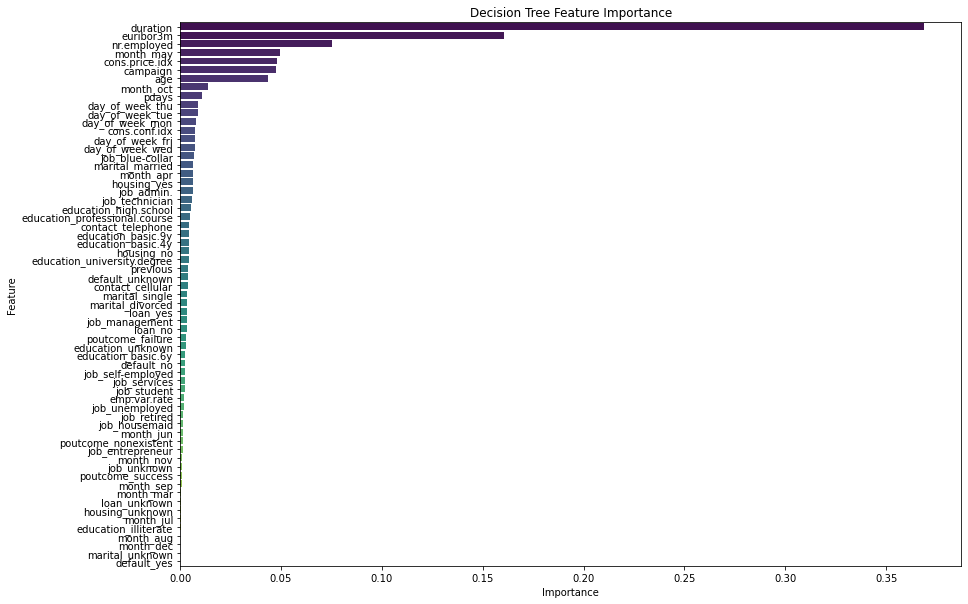

In [107]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': dt_y})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(14, 10))

# Plot the feature importance with rotated labels
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.yticks(fontsize=10)

plt.show()

In [108]:
dt_3 = DecisionTreeClassifier(random_state = 0, criterion = 'entropy', max_depth = 4)
dt_3.fit(X_train, y_train)

print("DT Train accuracy score: ",dt_3.score(X_train, y_train))
print("DT Test accuracy score: ",dt_3.score(X_test, y_test))

DT Train accuracy score:  0.8769329896907216
DT Test accuracy score:  0.8050675949162147


In [109]:
from sklearn.model_selection import GridSearchCV

opt_tree = DecisionTreeClassifier(random_state = 0) # here, impurity measure is default, Gini. more efficient

# Multiple hyperparameters to tune. separate elements by ,
# go through all possible combinations: 9*9*9 models, with 5 fold cv
dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11),
             'max_leaf_nodes':    range(2,11)   }

#Although we understand that these choices of hyperparameters are not accurate for our data set but because of the lack of 
#technical resources, we are using these. If given favorable conditions, we could have used max depth from 1 to 50, 
#min_sample_split from 2 to 500 and max_leaf_node from 10 to 1000.


grid_tree = GridSearchCV(opt_tree, dt_params)
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [110]:
grid_tree.best_params_

{'max_depth': 4, 'max_leaf_nodes': 9, 'min_samples_split': 2}

In [111]:
dt_4 = DecisionTreeClassifier(random_state = 0, criterion = 'entropy', max_depth = 4, max_leaf_nodes = 9 , min_samples_split = 2)
dt_4.fit(X_train, y_train)

print("DT Train accuracy score: ",dt_4.score(X_train, y_train))
print("DT Test accuracy score: ",dt_4.score(X_test, y_test))


y_pred_dt_4 = dt_4.predict(X_test)

my_matrix_dt_4 = confusion_matrix(y_test, y_pred_dt_4)
print(my_matrix_dt_4)

print("TP is:", my_matrix_dt_4[1,1])
print("TN is:", my_matrix_dt_4[0,0])
print("FP is:", my_matrix_dt_4[0,1])
print("FN is:", my_matrix_dt_4[1,0])



print('Precision score:', precision_score(y_test, y_pred_dt_4))
print('Recall score:', recall_score(y_test, y_pred_dt_4))
print('Accuracy score:', accuracy_score(y_test, y_pred_dt_4))
print('F1 score:', f1_score(y_test, y_pred_dt_4))




DT Train accuracy score:  0.8767963136519837
DT Test accuracy score:  0.8047437869343479
[[8637 2292]
 [ 120 1304]]
TP is: 1304
TN is: 8637
FP is: 2292
FN is: 120
Precision score: 0.36262513904338156
Recall score: 0.9157303370786517
Accuracy score: 0.8047437869343479
F1 score: 0.5195219123505976


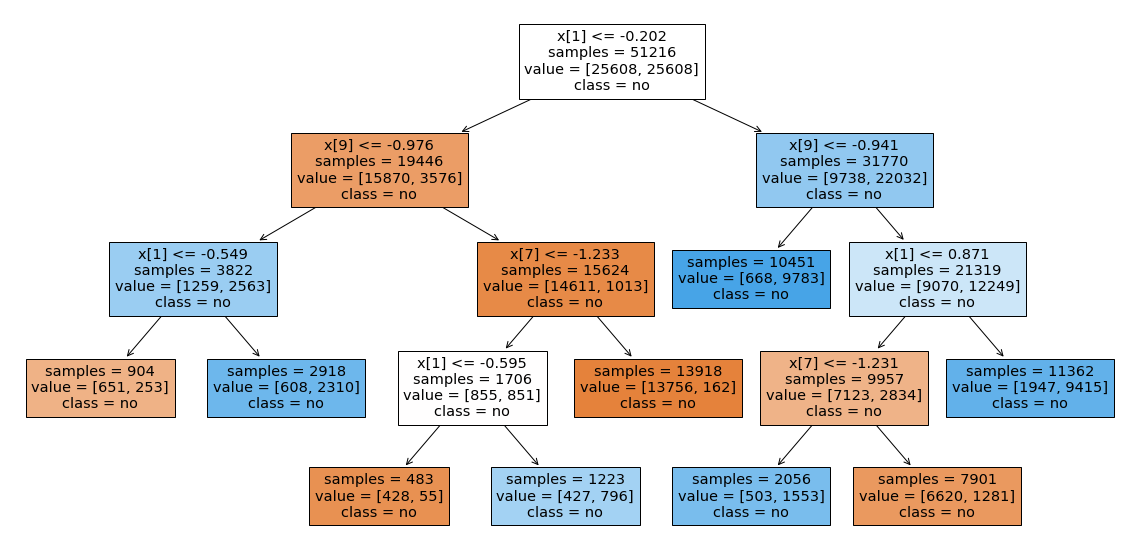

In [112]:
from sklearn import tree
# features_list=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
#        'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
#        'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
#        'cons.conf.idx', 'euribor3m', 'nr.employed']
fig = plt.figure(figsize=(20,10)) # set a proper figure size (in case that the figure is too small to read or ratio is not proper)

tree.plot_tree(grid_tree.best_estimator_, 
#                feature_names = features_list, # specify variable names 
               class_names = df.y, # specify class (Y) names
               filled = True, impurity = False) # whether to color the boxes, whether to report gini index
             #   fontsize = 12) # set fontsize to read
plt.show()

## Ensemble Methods

In [113]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Due to their high variance

from sklearn.svm import LinearSVC
#They focus on the points that are hardest to classify (support vectors), which can be a desirable property in an ensemble, 
#as these are the instances where gaining accuracy is most beneficial
#Using SVMs with different kernels (linear, polynomial, RBF, etc.) adds diversity

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [114]:
#Ensemble methods
# Decision tree Bagging

dt = DecisionTreeClassifier(random_state=42)

bag_DT = BaggingClassifier(dt, max_samples = 100, n_estimators = 200, bootstrap = True,
                            random_state=42)
bag_DT.fit(X_train, y_train)

print("DT with Bagging Train Accuracy: ",bag_DT.score(X_train, y_train))
print("DT with Bagging Test Accuracy: ",bag_DT.score(X_test, y_test))


y_pred_bag_DT = bag_DT.predict(X_test)

my_matrix_bag_DT = confusion_matrix(y_test, y_pred_bag_DT)
print(my_matrix_bag_DT)

print("TP is:", my_matrix_bag_DT[1,1])
print("TN is:", my_matrix_bag_DT[0,0])
print("FP is:", my_matrix_bag_DT[0,1])
print("FN is:", my_matrix_bag_DT[1,0])



print('Precision score:', precision_score(y_test, y_pred_bag_DT))
print('Recall score:', recall_score(y_test, y_pred_bag_DT))
print('Accuracy score:', accuracy_score(y_test, y_pred_bag_DT))
print('F1 score:', f1_score(y_test, y_pred_bag_DT))



DT with Bagging Train Accuracy:  0.892260231177757
DT with Bagging Test Accuracy:  0.8441674087266251
[[9155 1774]
 [ 151 1273]]
TP is: 1273
TN is: 9155
FP is: 1774
FN is: 151
Precision score: 0.4177879881851001
Recall score: 0.8939606741573034
Accuracy score: 0.8441674087266251
F1 score: 0.5694475508834713


In [115]:

#Ensemble methods bagging with best SVM model
# SVM Bagging

bag_svm2 = BaggingClassifier(best_svm_model, max_samples = 125, n_estimators = 200, bootstrap = True,
                            random_state=42)
bag_svm2.fit(X_train, y_train)

print("SVM with Bagging Train Accuracy: ", bag_svm2.score(X_train, y_train))
print("SVM with Bagging Test Accuracy: ", bag_svm2.score(X_test, y_test))

y_pred_bag_svm2 = bag_svm2.predict(X_test)

my_matrix_bag_svm2 = confusion_matrix(y_test, y_pred_bag_svm2)
print(my_matrix_bag_svm2)

print("TP is:", my_matrix_bag_svm2[1,1])
print("TN is:", my_matrix_bag_svm2[0,0])
print("FP is:", my_matrix_bag_svm2[0,1])
print("FN is:", my_matrix_bag_svm2[1,0])



print('Precision score:', precision_score(y_test, y_pred_bag_svm2))
print('Recall score:', recall_score(y_test, y_pred_bag_svm2))
print('Accuracy score:', accuracy_score(y_test, y_pred_bag_svm2))
print('F1 score:', f1_score(y_test, y_pred_bag_svm2))



SVM with Bagging Train Accuracy:  0.5933497344579819
SVM with Bagging Test Accuracy:  0.8984861976847729
[[10819   110]
 [ 1144   280]]
TP is: 280
TN is: 10819
FP is: 110
FN is: 1144
Precision score: 0.717948717948718
Recall score: 0.19662921348314608
Accuracy score: 0.8984861976847729
F1 score: 0.308710033076075


In [116]:

# Ensemble methods
# Decision Tree AdaBoost

# Define base model
dt1 = DecisionTreeClassifier(max_depth = 1, random_state = 42)
# AdaBoost
adaboostDT = AdaBoostClassifier(dt1, n_estimators = 200, learning_rate = 0.5, random_state = 42)
adaboostDT.fit(X_train, y_train)
# Performance

print("DT Adaptive Boost Train Accuracy: " , adaboostDT.score(X_train, y_train)) 
print("DT Adaptive Boost Test Accuracy: " , adaboostDT.score(X_test, y_test)) 
# with boosting, each learner's performance can be slightly below 0.5


y_pred_adaboostDT = adaboostDT.predict(X_test)

my_matrix_adaboostDT = confusion_matrix(y_test, y_pred_adaboostDT)
print(my_matrix_adaboostDT)

print("TP is:", my_matrix_adaboostDT[1,1])
print("TN is:", my_matrix_adaboostDT[0,0])
print("FP is:", my_matrix_adaboostDT[0,1])
print("FN is:", my_matrix_adaboostDT[1,0])



print('Precision score:', precision_score(y_test, y_pred_adaboostDT))
print('Recall score:', recall_score(y_test, y_pred_adaboostDT))
print('Accuracy score:', accuracy_score(y_test, y_pred_adaboostDT))
print('F1 score:', f1_score(y_test, y_pred_adaboostDT))



DT Adaptive Boost Train Accuracy:  0.9366994689159638
DT Adaptive Boost Test Accuracy:  0.9020480854853072
[[10187   742]
 [  468   956]]
TP is: 956
TN is: 10187
FP is: 742
FN is: 468
Precision score: 0.5630153121319199
Recall score: 0.6713483146067416
Accuracy score: 0.9020480854853072
F1 score: 0.612427930813581


## Model Performance Evaluation using ROC and AUC:

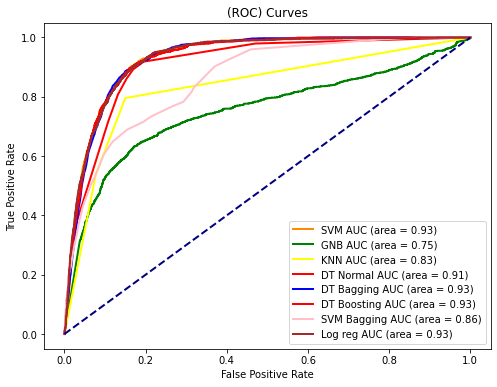

In [117]:

from sklearn.metrics import roc_curve, auc


# Get predicted probabilities for SVM
y_prob_svm = best_svm_model.decision_function(X_test)

# Calculate SVM ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)


# Get predicted probabilities for Gaussian Naive Bayes
y_prob_gnb = g_nb.predict_proba(X_test)[:, 1]

# Calculate Gaussian Naive Bayes ROC curve
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_prob_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)


# Get predicted probabilities for KNN
y_prob_KNN = knn2.predict_proba(X_test)[:, 1]

# Calculate KNN ROC curve
fpr_knn2, tpr_knn2, thresholds_knn2 = roc_curve(y_test, y_prob_KNN)
roc_auc_knn2 = auc(fpr_knn2, tpr_knn2)


# Get predicted probabilities for DT normal
y_prob_DT = grid_tree.predict_proba(X_test)[:, 1]

# Calculate DT ROC curve
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, y_prob_DT)
roc_auc_DT = auc(fpr_DT, tpr_DT)


# Get predicted probabilities for DT Ensemble (Bagging)
y_prob_DT_Bag = bag_DT.predict_proba(X_test)[:, 1]

# Calculate DT Ensemble (Bagging) ROC curve
fpr_DT_bag, tpr_DT_bag, thresholds_DT_bag = roc_curve(y_test, y_prob_DT_Bag)
roc_auc_DT_bag = auc(fpr_DT_bag, tpr_DT_bag)



# Get predicted probabilities for DT Ensemble (Adaptive Boost)
y_prob_DT_Boost = adaboostDT.predict_proba(X_test)[:, 1]

# Calculate DT Ensemble (Adaboost) ROC curve
fpr_DT_boost, tpr_DT_boost, thresholds_DT_boost = roc_curve(y_test, y_prob_DT_Boost)
roc_auc_DT_boost = auc(fpr_DT_boost, tpr_DT_boost)



# Get predicted probabilities for Best SVM Ensemble (bagging)
y_prob_SVM_bag = bag_svm2.predict_proba(X_test)[:, 1]

# Calculate SVM Ensemble (bagging) ROC curve
fpr_SVM_bag, tpr_SVM_bag, thresholds_SVM_bag = roc_curve(y_test, y_prob_SVM_bag)
roc_auc_SVM_bag = auc(fpr_SVM_bag, tpr_SVM_bag)



# Get predicted probabilities for Log reg
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]

# Calculate SVM Ensemble (bagging) ROC curve
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)







# Plot ROC curves on the same graph
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM AUC (area = {roc_auc_svm:.2f})')
plt.plot(fpr_gnb, tpr_gnb, color='green', lw=2, label=f'GNB AUC (area = {roc_auc_gnb:.2f})')
plt.plot(fpr_knn2, tpr_knn2, color='yellow', lw=2, label=f'KNN AUC (area = {roc_auc_knn2:.2f})')

plt.plot(fpr_DT, tpr_DT, color='red', lw=2, label=f'DT Normal AUC (area = {roc_auc_DT:.2f})')
plt.plot(fpr_DT_bag, tpr_DT_bag, color='blue', lw=2, label=f'DT Bagging AUC (area = {roc_auc_DT_bag:.2f})')
plt.plot(fpr_DT_boost, tpr_DT_boost, color='red', lw=2, label=f'DT Boosting AUC (area = {roc_auc_DT_boost:.2f})')
plt.plot(fpr_SVM_bag, tpr_SVM_bag, color='pink', lw=2, label=f'SVM Bagging AUC (area = {roc_auc_SVM_bag:.2f})')
plt.plot(fpr_logreg, tpr_logreg, color='brown', lw=2, label=f'Log reg AUC (area = {roc_auc_logreg:.2f})')



plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curves')
plt.legend(loc='lower right')
plt.show()
